In [2]:
import csv

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, hamming_loss, precision_score, recall_score
from skmultilearn.problem_transform import (BinaryRelevance, ClassifierChain,
                                            LabelPowerset)

     |████████████████████████████████| 89 kB 2.4 MB/s 


In [3]:

def getData(fileName, possiible_labels, total_attributes, limit_instances=0):

  # Abre o arquivo
  file = open('datasets/' + fileName)
  csvreader = csv.reader(file, delimiter =' ')

  data = []

  # Coloca o csv lido em um array
  # O csv tem uma última coluna vazia, por isso a descartamos no processo
  for row in csvreader:
    data.append(row[:-1])

  X = []
  Y = []

  # Pega os dados crus e os divide em atributos e rótulos.
  iteration_limit = len(data) if limit_instances == 0 else limit_instances
  for i in range(iteration_limit):

    # Inicializa o array de atributos para cada elemento
    lx = []
    for j in range(total_attributes):
      lx.append(np.nan)

    # Trata os valores para se encaixar no modelo de dados aceito pelo sklearn
    for j in range(1, len(data[i])):
      attribute = int(data[i][j].split(":")[0]) - 1
      lx[attribute] = float(data[i][j].split(":")[1])

    X.append(lx)

    # Os rótulos obtidos pelo csv estão todos juntos no primeiro atributo, separados por virgula
    # Para cada um dos rótulos possíveis (definido em possible_labels), verifica se o elemento contém ou não cada um dos rótulus
    # e cria novas colunas na tabela com valores 0 ou 1 que indicam se o elemento tem ou não determinado rótulo
    ly = []
    for j in range(len(possible_labels)):
      ly.append(1 if possible_labels[j] in data[i][0].split(",") else 0)
    Y.append(ly)

  # Para valores ausentes, coloca-se a média dos outros elementos para aquele atributo
  imp = SimpleImputer(missing_values=np.nan, strategy='mean')
  X = imp.fit_transform(X)

  return [X, Y]

In [4]:
def execute(classifier, X_train, X_test, Y_train, Y_test):
    classifier.fit(np.array(X_train), np.array(Y_train))

    pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(Y_test, pred)
    hl = hamming_loss(Y_test, pred)
    precision = precision_score(Y_test, pred, average='macro')
    recall = recall_score(Y_test, pred, average='macro')

    return {
        'accuracy': accuracy,
        'hamming_loss': hl,
        'precision': precision,
        'recall': recall
    }

In [ ]:
class RunResult:
  algorithm: str
  dataset: str
  accuracy_score: float
  hamming_loss: float
  precision: float
  recall: float

  def __init__(self, algorithm, dataset, accuracy_score, hamming_loss, precision, recall):
    self.algorithm = algorithm
    self.dataset = dataset
    self.accuracy_score = accuracy_score
    self.hamming_loss = hamming_loss
    self.precision = precision
    self.recall = recall

results = []

In [9]:
classifiers = [{"name": "Classifier Chain", "model": ClassifierChain(RandomForestClassifier())}, 
               {"name": "Binary Relevance", "model": BinaryRelevance(RandomForestClassifier())}, 
               {"name": "Label Powerset", "model": LabelPowerset(RandomForestClassifier())}]

## Dataset Yeast


---
O dataset yeast é um conjunto de dados de leveduras(fermentos) que consiste em uma interação proteína-proteína. Os métodos de detecção de interação levaram à descoberta de milhares de interações entre proteínas, e ajudam fomentar a relevância em conjuntos de dados de grandes escala para a biologia atual.

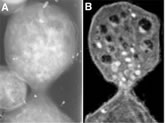


In [12]:
# Dataset Yeast
possible_labels = []
total_attributes = 103

for i in range(15):
  possible_labels.append(str(i))

X_train, Y_train = getData("yeast/yeast_train", possible_labels, total_attributes)
X_test, Y_test = getData("yeast/yeast_test", possible_labels, total_attributes)

for classifier in classifiers:
  print(classifier["name"], execute(classifier["model"], X_train, X_test, Y_train, Y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier Chain {'accuracy': 0.21046892039258452, 'hamming_loss': 0.18102508178844057, 'precision': 0.5824324517383631, 'recall': 0.3084554012336902}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Binary Relevance {'accuracy': 0.1723009814612868, 'hamming_loss': 0.17949836423118865, 'precision': 0.6583924649609207, 'recall': 0.29691844850470656}
Label Powerset {'accuracy': 0.2693565976008724, 'hamming_loss': 0.19047619047619047, 'precision': 0.5189303235705965, 'recall': 0.3759485283568647}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Scene

In [ ]:
possible_labels = ['0', '1', '2', '3', '4', '5']

X_test, Y_test = getData('scene/scene_test', possible_labels, 294)
X_train, Y_train = getData('scene/scene_train', possible_labels, 294)

for classifier in classifiers:
  print(classifier["name"], execute(classifier["model"], X_train, X_test, Y_train, Y_test))

# TMC 2007

In [ ]:
possible_labels = []

for i in range(101):
    possible_labels.append(str(i))

X_test, Y_test = getData('tmc2007/tmc2007_test', possible_labels, 47152, limit_instances=1000)
X_train, Y_train = getData('tmc2007/tmc2007_train', possible_labels, 47152, limit_instances=5000)

for classifier in classifiers:
  print(classifier["name"], execute(classifier["model"], X_train, X_test, Y_train, Y_test))

# Emotions

In [ ]:
# Dataset emotions
possible_labels = ["amazed-suprised", "happy-pleased", "relaxing-calm", 
                    "quiet-still", "sad-lonely", "angry-aggresive"]
total_attributes = 73

X_test, Y_test = getData("emotions/emotions_test.csv", possible_labels, total_attributes)
X_train, Y_train = getData("emotions/emotions_train.csv", possible_labels, total_attributes)

for classifier in classifiers:
  print(classifier["name"], execute(classifier["model"], X_train, X_test, Y_train, Y_test))

# Mediamill

In [ ]:
# Dataset mediamill
possible_labels = []
total_attributes = 120

for i in range(101):
  possible_labels.append(str(i))

X_train, Y_train = getData("mediamill/mediamill_train.csv", possible_labels, total_attributes)
X_test, Y_test = getData("mediamill/mediamill_test.csv", possible_labels, total_attributes)

# Tive que reduzir o cunjunto de dados pois estava demorando muito o treinamento
X_train = X_train[:1000]
Y_train = Y_train[:1000]

X_test = X_test[:200]
Y_test = Y_test[:200]

for classifier in classifiers:
  print(classifier["name"], execute(classifier["model"], X_train, X_test, Y_train, Y_test))